## Project - Performing EDA on Titanic dataset

### What is Titanic datase?
- The Titanic dataset contains the data of all passenger boarded the ship.
- It has information of survival status of the passengers

### Objective of Exploratory Data Analysis:
- To understand the survival status of the passengers

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
titanic = pd.read_csv (r'D:\NEEL_FOLDER (All Files of Neel)\Data Science\Exploratory Data Analysis\Titanic_Train.csv')

In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic.shape

(891, 12)

In [12]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 1. Observation of Dataset:

In the above code we can see their are 12 columns in the data set, below are the information provided in the
respective column.

1. PassengerId: Unique passenger Id of the passenger
2. Survived: Survival status of the passenger. 0 = not survived 1 = Survived
3. Pclass: CLass of ticket. 1 = 1st, 2 = 2nd and 3 = 3rd
4. Name: Name of passenger
5. Sex: Gender of passenger.
6. Age: Age of passenger in years
7. SibSp: Number of siblings / spouses aboard the Titanic
8. Parch: Number of parents / children aboard the Titanic
9. Ticket: Ticket number
10. Fare: Passenger fare
11. Cabin: Cabin number
12. Embarked: Port of Embarkation (boarding). C = Cherbourg, Q = Queenstown, S = Southampton

### 2. Missing Data

In [20]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Observation from the Missing data:
- 3 column has missing value i.e Age, Cabin & Embarked

### 3. Treating the Missing value
- We can remove the Cabin column as it's not important
- Embarked has 2 missing value, as the number is less we can remove those from the dataset
- Age has approx 20% of missing value, so we will replace those values with some form of imputation.

- Lets check the average age with passenger class using box plot

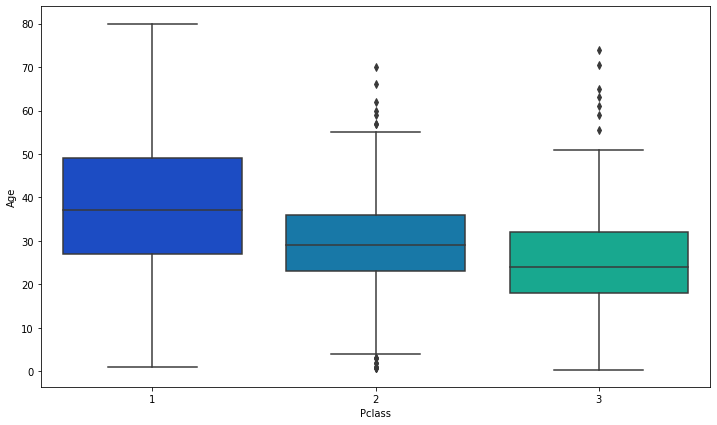

In [21]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')

- Lets check the average age with PARCH using box plot.

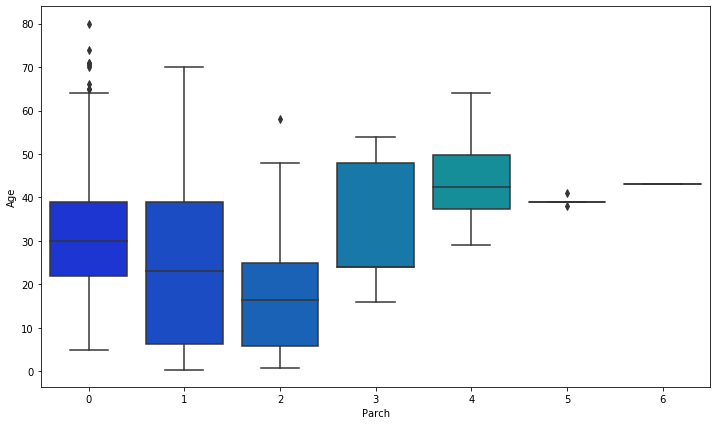

In [22]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Parch',y='Age',data=titanic,palette='winter')

#### Observation:
- We should consider the relation of age with Pclass as it divides the average age properly between 3 classes.
- The average age of 1st class = 37, 2nd class = 29 and 3rd class = 24
- We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.
- Relation of age and Parch does not help in finding the average age.

#### Replacing the null values

In [35]:
#below code will replace the null values of age
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [37]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

In [38]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Removing Null values

In [39]:
#removing null values from Embarked column
titanic = titanic[titanic['Embarked'].notna()]

In [49]:
#Dropping the Cabin Column
titanic_1 = titanic.drop(['Cabin'], axis = 1)

In [50]:
titanic_1.shape

(889, 11)

In [52]:
titanic_1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 4. Dropping columns which are not needed

In [53]:
#Dropping ticket column
Titanic_2 = titanic_1.drop(['Ticket'], axis = 1)

In [54]:
Titanic_2.shape

(889, 10)

### 5. Bivariate analysis

#### Survived and Sex

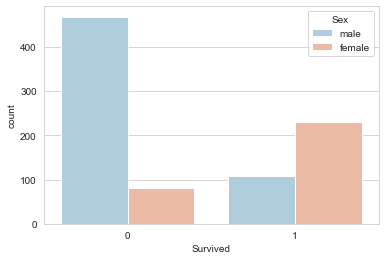

In [55]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=Titanic_2,palette='RdBu_r')

#### Observation of Survived and Sex 
- Survival status of female is more in compare to male.

#### Survived and PClass

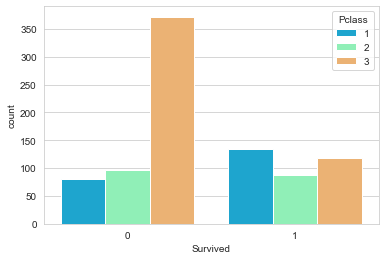

In [60]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=Titanic_2,palette='rainbow')

#### Observation of Survived and PClass
- Passenger in class 3 have survived less
- Passenger in class 1 have survived more in compare to class 1 & 2

#### Survived and Age

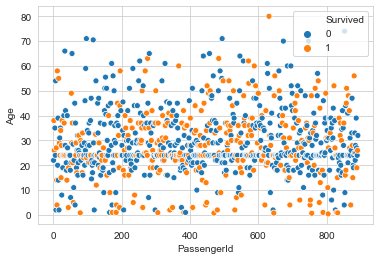

In [66]:
sns.scatterplot(x = Titanic_2.PassengerId, y = Titanic_2['Age'], hue = Titanic_2['Survived'])
plt.show()

#### Observation Survived and Age
- Passenger age between 0-20 have survival status more in compare to age 20-40.

#### Survived and Fare

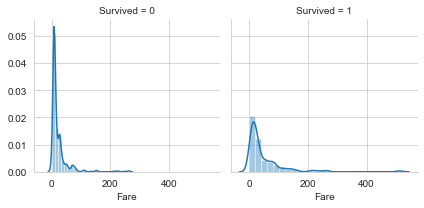

In [73]:
sns.FacetGrid(Titanic_2, col="Survived").map(sns.distplot, "Fare", bins=25)
plt.show()

#### Observation Survived and Fare
- We can get a rough idea, the survival status is less for those who paid low fare.

####  Survived and SibSp

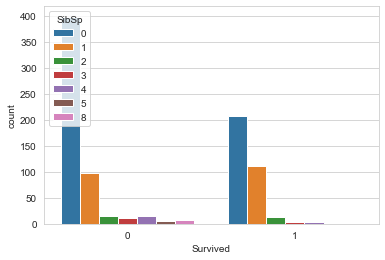

In [74]:
sns.countplot(x='Survived',hue='SibSp',data=Titanic_2)

#### Observation Survived and SibSp
- Passenger with 0 siblings/spouses have survived less.
- Passenger with 4, 5 & 8 siblings have survived less.

#### Survived and Parch

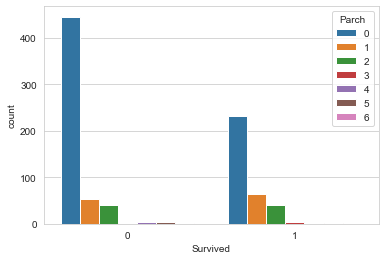

In [75]:
sns.countplot(x='Survived',hue='Parch',data=Titanic_2)

#### Observation Survived and Parch
- Single passenger have survived less.
- Passenger with children more than 3 have less survival status.

#### Survived and Embarked

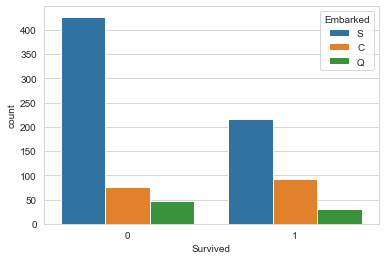

In [76]:
sns.countplot(x='Survived',hue='Embarked',data=Titanic_2)

#### Observation Survived and Embarked
- Passenger boarded from Southampton have less survival status in compare to other 2 ports.

### 6. Multivariate Analyse

#### Sex, Pclass and Survived

In [80]:
pd.crosstab([Titanic_2.Sex,Titanic_2.Survived],Titanic_2.Pclass,margins=True).style.background_gradient(cmap='summer_r')

#### Observation Sex, Pclass and Survived
- Ratio of female survival is more in compare to male
- Female of Pclass 1 & 2 have survived more
- Male of Pclass 3 have less survival status

## Conclusion:
- Survival status of female passenger is more in compare to male passenger
- Passenger in Pclass 3 have survived less in compare to other 2 classes
- Passenger boarded from Southampton have less survival status in compare to other 2 ports

###### (Credit: Data Science with Sharan and Krish Naik)